Bad value in file WindowsPath('C:/Users/14741/.matplotlib/stylelib/my_style.mplstyle'), line 1 ('figure.facecolor : #fdfdfd'): Key figure.facecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/14741/.matplotlib/stylelib/my_style.mplstyle'), line 19 ('axes.facecolor : #f0f0f0'): Key axes.facecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/14741/.matplotlib/stylelib/my_style.mplstyle'), line 21 ('grid.color : #cccccc'): Key grid.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/14741/.matplotlib/stylelib/my_style.mplstyle'), line 29 ('legend.facecolor : #efefef'): Key legend.facecolor: '' does not look like a color arg
C:\Users\14741\AppData\Local\Temp\ipykernel_40272\3173018829.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

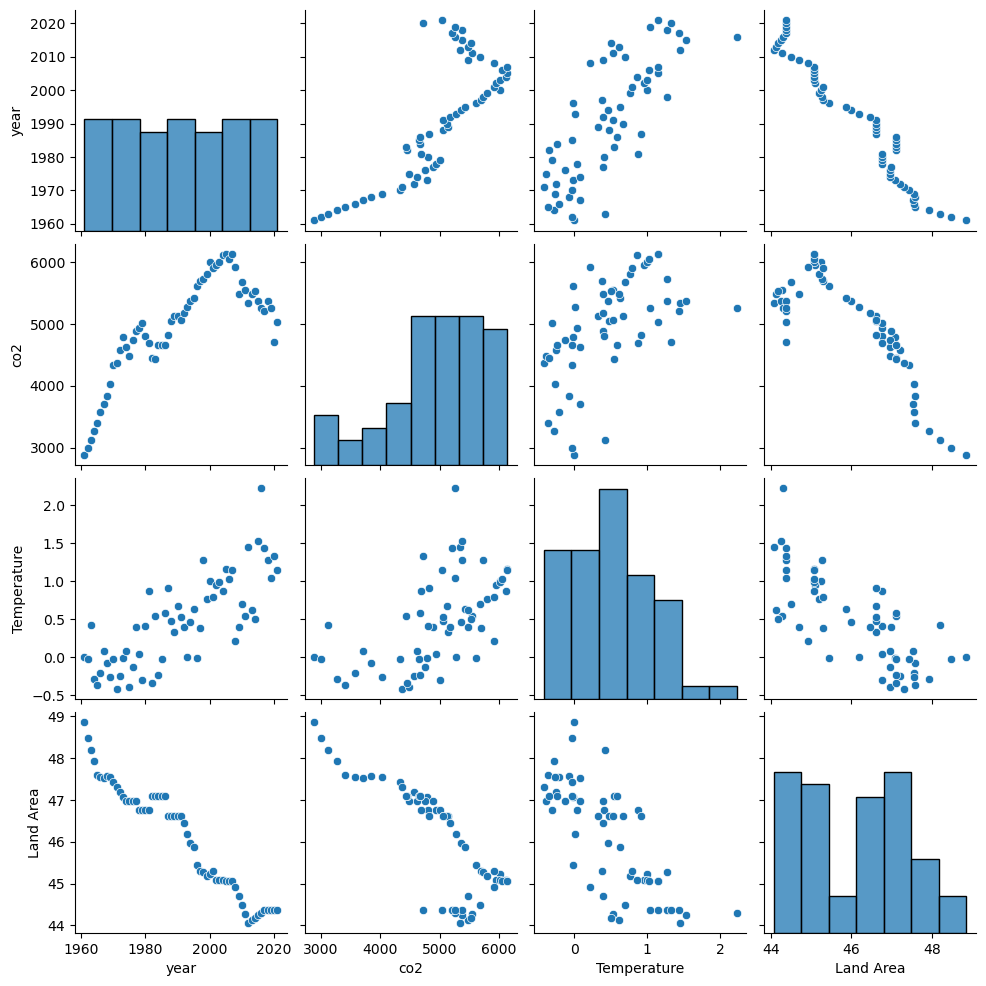

Mean Squared Error: 0.33547348507839864
R-squared: 0.8101696501323408


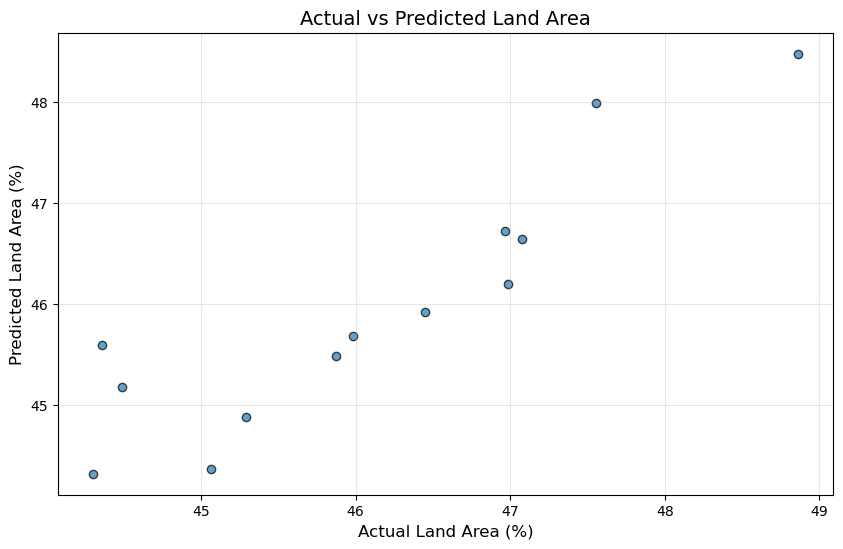

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data loading
co2_data = pd.read_csv('D:/24fall/DS5550/project/code/owid-co2-data.csv')
temperature_data = pd.read_csv('D:/24fall/DS5550/project/code//Annual_Surface_Temperature_Change.csv')
land_area_data = pd.read_csv('D:/24fall/DS5550/project/code/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_2389.csv', skiprows=4)

# 2. Data cleaning and screening
# Correct year column names in temperature data
temperature_data.columns = temperature_data.columns.str.lstrip('F')

# Filtering of U.S. data
us_co2_data = co2_data[co2_data['country'] == 'United States']
us_temperature_data = temperature_data[temperature_data['Country'] == 'United States']
us_land_area_data = land_area_data[land_area_data['Country Name'] == 'United States']

# Convert temperature data to long form
us_temperature_data = us_temperature_data.melt(
    id_vars=['Country'], 
    var_name='year', 
    value_name='Temperature'
)

# Convert years to numeric types
us_temperature_data['year'] = pd.to_numeric(us_temperature_data['year'], errors='coerce')
us_co2_data['year'] = pd.to_numeric(us_co2_data['year'], errors='coerce')
us_land_area_data = us_land_area_data.melt(
    id_vars=["Country Name", "Country Code"], 
    var_name="Year", 
    value_name="Land Area"
)
us_land_area_data['Year'] = pd.to_numeric(us_land_area_data['Year'], errors='coerce')

# Remove invalid lines
us_temperature_data = us_temperature_data.dropna(subset=['year', 'Temperature'])

# 3. Data consolidation
merged_data = pd.merge(us_co2_data, us_temperature_data, on='year', how='inner')
merged_data = pd.merge(merged_data, us_land_area_data, left_on='year', right_on='Year', how='inner')

# Retain the required columns
merged_data = merged_data[['year', 'co2', 'Temperature', 'Land Area']].dropna()

# 4. Data exploration
sns.pairplot(merged_data)
plt.show()

# 5. Characterization and target variables
X = merged_data[['co2', 'Temperature']]
y = merged_data['Land Area']

# 6. Data segmentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model training
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output assessment results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization results: real values vs. projected values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.xlabel("Actual Land Area (%)", fontsize=12)
plt.ylabel("Predicted Land Area (%)", fontsize=12)
plt.title("Actual vs Predicted Land Area", fontsize=14)
plt.grid(alpha=0.3)
plt.show()



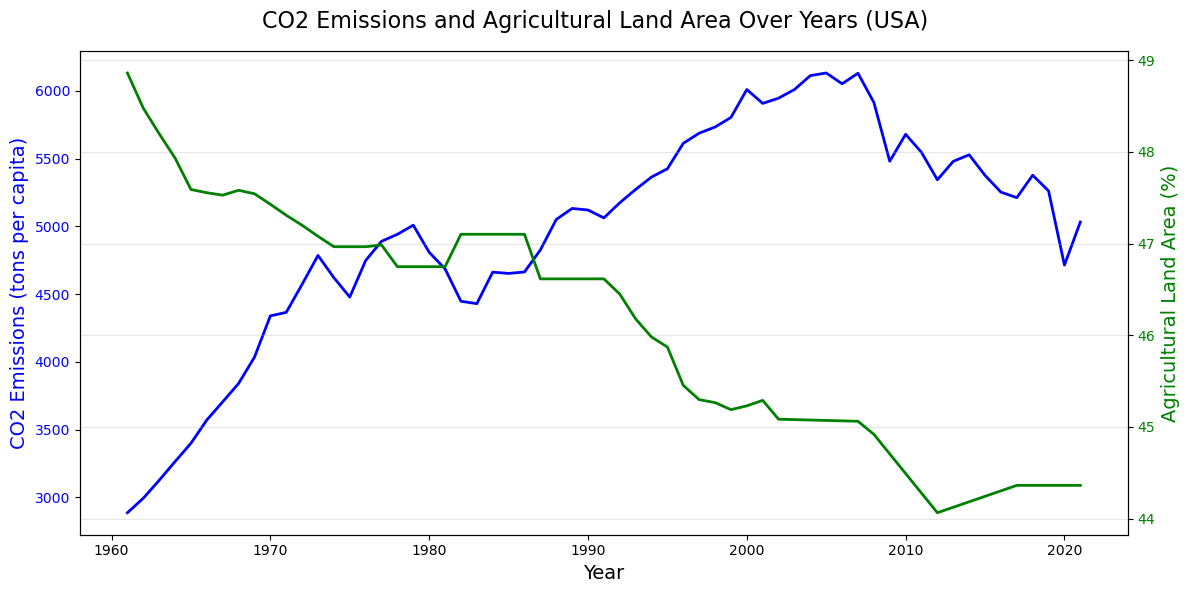

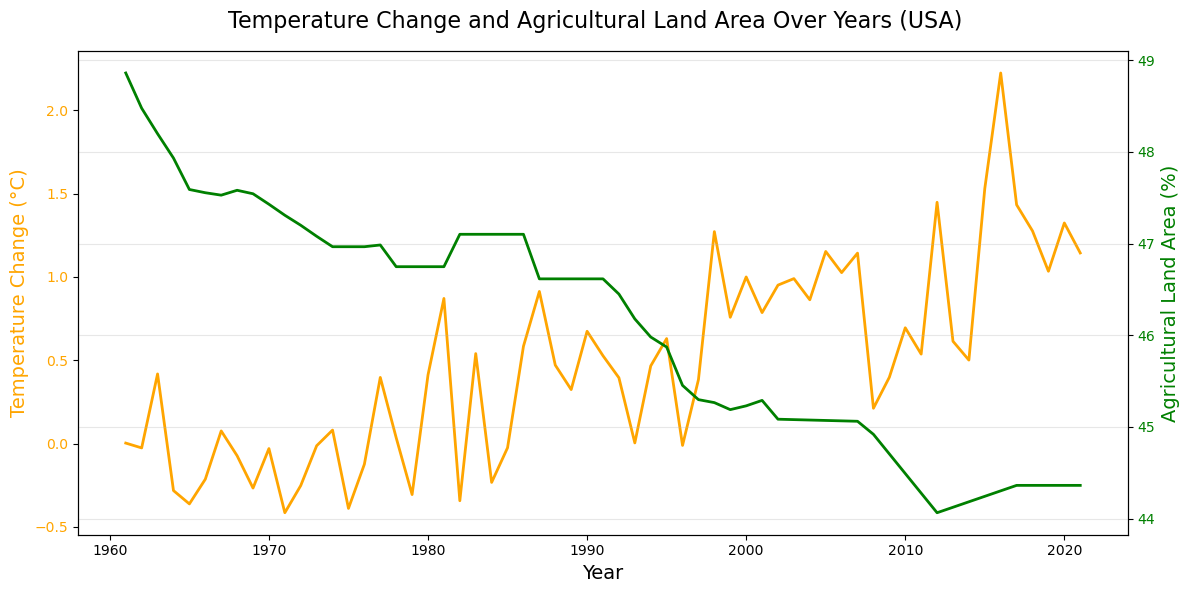

In [ ]:
# Plot of CO2 and land area versus year in the US
fig, ax1 = plt.subplots(figsize=(12, 6))

# CO2 data (left axis)
ax1.plot(merged_data['year'], merged_data['co2'], color="blue", label="CO2 Emissions (tons per capita)", linewidth=2)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("CO2 Emissions (tons per capita)", color="blue", fontsize=14)
ax1.tick_params(axis='y', labelcolor="blue")

# Data on agricultural land area (right axis)
ax2 = ax1.twinx()
ax2.plot(merged_data['year'], merged_data['Land Area'], color="green", label="Agricultural Land Area (%)", linewidth=2)
ax2.set_ylabel("Agricultural Land Area (%)", color="green", fontsize=14)
ax2.tick_params(axis='y', labelcolor="green")

fig.suptitle("CO2 Emissions and Agricultural Land Area Over Years (USA)", fontsize=16)
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()

# Plot of temperature and land area versus year in the United States
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature data (left axis)
ax1.plot(merged_data['year'], merged_data['Temperature'], color="orange", label="Temperature Change (°C)", linewidth=2)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Temperature Change (°C)", color="orange", fontsize=14)
ax1.tick_params(axis='y', labelcolor="orange")

# Data on agricultural land area (right axis)
ax2 = ax1.twinx()
ax2.plot(merged_data['year'], merged_data['Land Area'], color="green", label="Agricultural Land Area (%)", linewidth=2)
ax2.set_ylabel("Agricultural Land Area (%)", color="green", fontsize=14)
ax2.tick_params(axis='y', labelcolor="green")

fig.suptitle("Temperature Change and Agricultural Land Area Over Years (USA)", fontsize=16)
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import os
from codecarbon import EmissionsTracker

# Make sure the output directory exists
output_dir = "carbon_emissions"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Initialize the CodeCarbon tracker
tracker = EmissionsTracker(output_dir=output_dir, allow_multiple_runs=True)

# Start tracking
tracker.start()

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Stop tracking
emissions = tracker.stop()

# Ensure emissions return valid results
if emissions is not None:
    print(f"Total CO2 emissions during model training: {emissions:.2f} kg")
else:
    print("CodeCarbon failed to track emissions.")


[codecarbon WARNING @ 15:28:26] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 15:28:26] [setup] RAM Tracking...
[codecarbon INFO @ 15:28:26] [setup] GPU Tracking...
[codecarbon INFO @ 15:28:26] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 15:28:26] [setup] CPU Tracking...
[codecarbon WARNING @ 15:28:26] No CPU tracking mode found. Falling back on CPU constant mode. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 15:28:28] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
[codecarbon INFO @ 15:28:28] >>> Tracker's metadata:
[codecarbon INFO @ 15:28:28]   Platform system: Windows-11-10.0.22000-SP0
[codecarbon INFO @ 15:28:28]   Python version: 3.12.4
[codecarbon INFO @ 15:28:28]   CodeCarbon version: 2.8.0
[codecarbon INFO @ 15:28:28]   Available RAM : 7.921 GB
[codecarbon INFO @ 15:28:28]   CPU count: 12
[codecarbon INFO @ 15:28:28]   CPU model: Intel(R) Core(TM) i7

Total CO2 emissions during model training: 0.00 kg


d:\4\Lib\site-packages\codecarbon\output_methods\file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])
